# Battery Management System

A  Li-ion batteries (#5) was run through 3 different operational profiles (charge, discharge and impedance) at room temperature. Charging was carried out in a constant current (CC) mode at 1.5A until the battery voltage reached 4.2V and then continued in a constant voltage (CV) mode until the charge current dropped to 20mA. Discharge was carried out at a constant current (CC) level of 2A until the battery voltage fell to  2.2V. Impedance measurement was carried out through an electrochemical impedance spectroscopy (EIS) frequency sweep from 0.1Hz to 5kHz. Repeated charge and discharge cycles result in accelerated aging of the batteries while impedance measurements provide insight into the internal battery parameters that change as aging progresses. The experiments were stopped when the batteries reached end-of-life (EOL) criteria, which was a 30% fade in rated capacity (from 2Ahr to 1.4Ahr). This dataset can be used for the prediction of both remaining charge (for a given discharge cycle) and remaining useful life (RUL).


# Importing the libraries

In [1]:
#import necessary libraries
import scipy.io
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Loading Matlab file

In [2]:
#Loading the dataset
m=scipy.io.loadmat("B0005.mat")['B0005']

In [3]:
#function for retrieving data from the .mat file 
def load(m):   
    #retrieving columns from discharge,charging,impedance data 
    counter1=0 #for cycle count of discharge field
    counter2=0 #for cycle count of charge field
    counter3 = 0 #for cycle count of impedance field
    dataset1 = [] #list to store records of all discharge field
    dataset2=[] #list to store records of all charge field
    dataset3=[] #list to store records of all impedance field
    #looping through each record to identify discharge, charge and impedance type data
    for i in range(len(m[0][0][0][0])): 
        if m[0][0][0][0][i][0][0]=='discharge':
            t=m[0][0][0][0][i]
            temp=t[1][0][0]
            date_time = datetime.datetime(int(t[2][0][0]),int(t[2][0][1]),int(t[2][0][2]),int(t[2][0][3]),int(t[2][0][4])) + datetime.timedelta(seconds=int(t[2][0][5]))
            data=t[3]
            capacity = data[0][0][6][0][0]
            #looping through each fields to retrieve value
            for j in range(len(data[0][0][0][0])):
                voltage_measured = data[0][0][0][0][j]
                current_measured = data[0][0][1][0][j]
                temperature_measured = data[0][0][2][0][j]
                current_load = data[0][0][3][0][j]
                voltage_load = data[0][0][4][0][j]
                time = data[0][0][5][0][j]
                #appending the retrieved value in list with cycle number
                dataset1.append([counter1 + 1, temp, date_time,voltage_measured, current_measured,temperature_measured, current_load,
                            voltage_load, time,capacity])
            counter1 = counter1 + 1
    #processing for charging column data
        if m[0][0][0][0][i][0][0]=='charge':
            t=m[0][0][0][0][i]
            temp=t[1][0][0]
            date_time = datetime.datetime(int(t[2][0][0]),int(t[2][0][1]),int(t[2][0][2]),int(t[2][0][3]),int(t[2][0][4])) + datetime.timedelta(seconds=int(t[2][0][5]))
            data=t[3]
            #looping through each fields to retrieve value
            for j in range(len(data[0][0][0][0])):
                voltage_measured = data[0][0][0][0][j]
                current_measured = data[0][0][1][0][j]
                temperature_measured = data[0][0][2][0][j]
                current_load = data[0][0][3][0][j]
                voltage_load = data[0][0][4][0][j]
                time = data[0][0][5][0][j]
                #appending the retrieved value in list with cycle number
                dataset2.append([counter2 + 1, temp, date_time,voltage_measured, current_measured,temperature_measured, current_load,
                            voltage_load, time])
            counter2 = counter2 + 1
    #processing for impedance column data
        if m[0][0][0][0][i][0][0]=='impedance':
            t=m[0][0][0][0][i]
            temp=t[1][0][0]
            date_time = datetime.datetime(int(t[2][0][0]),int(t[2][0][1]),int(t[2][0][2]),int(t[2][0][3]),int(t[2][0][4])) + datetime.timedelta(seconds=int(t[2][0][5]))
            data=t[3]
            Re = data[0][0][5][0][0]
            Rct=data[0][0][6][0][0]
            #looping through each fields to retrieve value
            for j in range(len(data[0][0][0][0])):
                sense_current = data[0][0][0][0][j]
                battery_current = data[0][0][1][0][j]
                current_ratio = data[0][0][2][0][j]
                battery_impedance = data[0][0][3][j][0]
                try:
                    Rectified_impedance = data[0][0][4][j][0]
                except:
                    Rectified_impedance =0
                #appending the retrieved value in list with cycle number
                dataset3.append([counter3 + 1, temp, date_time,sense_current, battery_current,current_ratio, battery_impedance,
                Rectified_impedance, Re, Rct])
            counter3 = counter3 + 1
    #returning list which contains discharge data,charge data and impedance data
    return dataset1, dataset2, dataset3

In [4]:
#getting loaded datasets for charging,discharging and impedance
dataset1, dataset2, dataset3=load(m)

In [5]:
#discharging field dataframe-converting the dataset1 list to dataframe
df=pd.DataFrame(data=dataset1,
                       columns=['cycle', 'ambient_temperature', 'datetime',
                                 'voltage_measured',
                                'current_measured', 'temperature_measured',
                                'current_load', 'voltage_load', 'time','capacity'])

In [6]:
#checking the head of the data frame
df.head()

,cycle,ambient_temperature,datetime,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,capacity
0,1,24,2008-04-02 15:25:41,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000,1.856487
1,1,24,2008-04-02 15:25:41,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781,1.856487
2,1,24,2008-04-02 15:25:41,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703,1.856487
3,1,24,2008-04-02 15:25:41,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781,1.856487
4,1,24,2008-04-02 15:25:41,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922,1.856487


In [7]:
#charging field dataframe-converting the dataset2 list to dataframe
df2=pd.DataFrame(data=dataset2,
                       columns=['cycle', 'ambient_temperature', 'datetime',
                                 'voltage_measured',
                                'current_measured', 'temperature_measured',
                                'current_load', 'voltage_load', 'time'])

In [8]:
#checking the head of the dataframe
df2.head()

,cycle,ambient_temperature,datetime,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
0,1,24,2008-04-02 13:08:17,3.873017,-0.001201,24.655358,0.000,0.003,0.000
1,1,24,2008-04-02 13:08:17,3.479394,-4.030268,24.666480,-4.036,1.570,2.532
2,1,24,2008-04-02 13:08:17,4.000588,1.512731,24.675394,1.500,4.726,5.500
3,1,24,2008-04-02 13:08:17,4.012395,1.509063,24.693865,1.500,4.742,8.344
4,1,24,2008-04-02 13:08:17,4.019708,1.511318,24.705069,1.500,4.753,11.125


# Visualisation

Text(0.5, 1.0, 'cycle vs capacity')

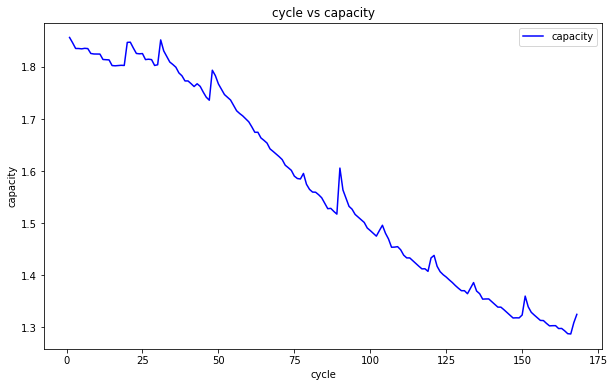

In [9]:
#plotting to see how capacity varies with cycle
plt.figure(figsize=(10, 6))
plt.plot(df['cycle'],df['capacity'],color="blue",label="capacity")
plt.xlabel("cycle")
plt.ylabel("capacity")
plt.legend()
plt.title("cycle vs capacity")

<b>From  the above graph it is seen that the capacity degrades when the cycle increases.  </b>

Text(0.5, 1.0, 'cycle vs capacity with Threshold')

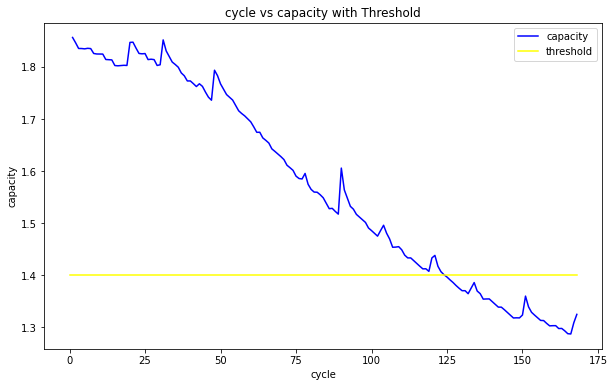

In [10]:
#plotting to see how capacity decreases with cycle with threshold 
plt.figure(figsize=(10, 6))
plt.plot(df['cycle'],df['capacity'],color="blue",label="capacity")
plt.plot([0.,max(df["cycle"])], [1.4, 1.4],color="yellow",label="threshold")
plt.xlabel("cycle")
plt.legend()
plt.ylabel("capacity")
plt.title("cycle vs capacity with Threshold")

<b>It is given that the battery will reach the end of life when the capacity reaches the 1.4Ahr. From the above graph it is seen that the given battery have reached the end of life threshold at almost 125th cycle   </b>

<B>DISCHARGE DATA VISUALISATION</B>

Text(0.5, 1.0, 'Voltage measured vs Discharge time')

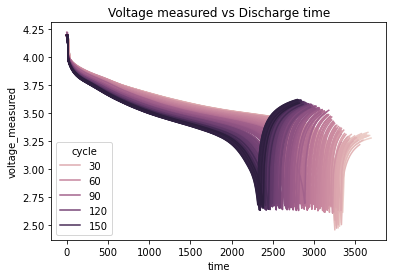

In [11]:
#Visualisation of variation in voltage measured vs Discharge time
sns.lineplot(data=df,x="time",y="voltage_measured",hue="cycle")
plt.title("Voltage measured vs Discharge time")

<b>From the above graph it is seen that the voltage drops almost to 2.7V after certain amount of time and  Moreover it is seen that the voltage of aged cell drops earlier than that of fresh cell.</b>

Text(0.5, 1.0, 'Temperature measured vs Discharge time')

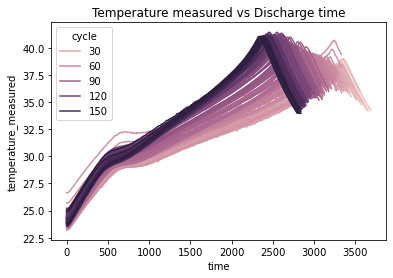

In [12]:
#Visualisation to see how Discharge temperature varies with time
sns.lineplot(data=df,x="time",y="temperature_measured",hue="cycle")
plt.title("Temperature measured vs Discharge time")

<b>From the above visualisation it is seen that the temperature seems to increase with time. Also it is noticed that the aged cell reaches the maximum temperature earlier than the fresh cell. </b>

<AxesSubplot:title={'center':'Current measured vs Discharge time'}, xlabel='time', ylabel='current_measured'>

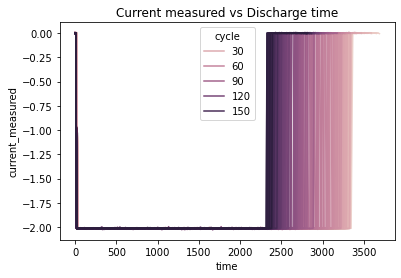

In [13]:
#Visualisation to see how Discharge current measured varies with time
plt.title("Current measured vs Discharge time")
sns.lineplot(data=df,x="time",y="current_measured",hue="cycle")

<b>The above figure shows how the current measured varies with time. It is seen that the current of aged cells  drops and rises to 0 earlier than the new cells  </b>

<B>CHARGE DATA VISUALISATION</B>

Text(0.5, 1.0, 'Current Measured vs charge time')

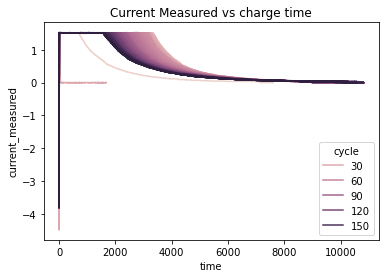

In [14]:
#Time vs charge current measured-cc mode at 1.5A and dropped to 20mA(0.02A)
sns.lineplot(data=df2,x='time',y='current_measured',hue="cycle")
plt.title("Current Measured vs charge time")

<b>From the above graph it is seen that the current was at 1.5A for some time eventually falls after certain point of time. Also It is seen that the current of aged cell begins to drop from the constant current earlier than the fresh cell. </b>

Text(0.5, 1.0, 'Temperature measured vs charge time')

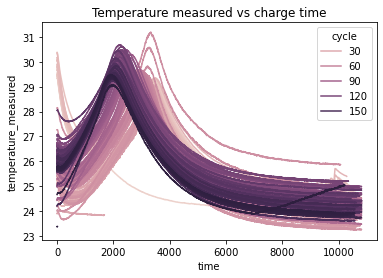

In [15]:
#Visualisation to see how temperature measured varies with charging time
sns.lineplot(data=df2,x="time",y="temperature_measured",hue="cycle")
plt.title("Temperature measured vs charge time")

<b>The above graph shows the temperature measured at each time.It is seen that the aged cell reaches the maximum temperature earlier than the fresh cell. Generally,  temperature affects both performance and life cycle of a battery as it speeds up the chemical reactions inside the battery. </b>

Text(0.5, 1.0, 'Voltage measured vs charge time')

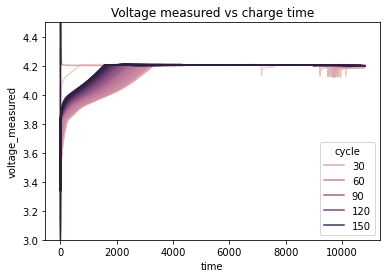

In [16]:
#Visualisation to see how charging voltage measured varies with time
sns.lineplot(data=df2,x='time',y='voltage_measured',hue="cycle")
plt.ylim(3,4.5)
plt.title("Voltage measured vs charge time")

<b>The above figure shows how the voltage measured varies with time.It is seen that the voltage of a aged battery rises faster than a new one in the Constant current charging phase  </b>

In [17]:
#Grouping by cycle and displaying maximum of each field in discharge data with respect to the cycle
gdf=df.groupby("cycle").max().reset_index()
gdf.head()

,cycle,ambient_temperature,datetime,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,capacity
0,1,24,2008-04-02 15:25:41,4.191492,0.000729,38.982181,-0.0004,4.206,3690.234,1.856487
1,2,24,2008-04-02 19:43:48,4.189773,0.002927,39.033398,-0.0006,4.204,3672.344,1.846327
2,3,24,2008-04-03 00:01:06,4.188187,0.001484,38.818797,-0.0004,4.203,3651.641,1.835349
3,4,24,2008-04-03 04:16:37,4.188461,0.001547,38.762305,-0.0006,4.203,3631.563,1.835263
4,5,24,2008-04-03 08:33:25,4.188299,0.001701,38.665393,-0.0006,4.203,3629.172,1.834646


Text(0.5, 1.0, 'Capacity')

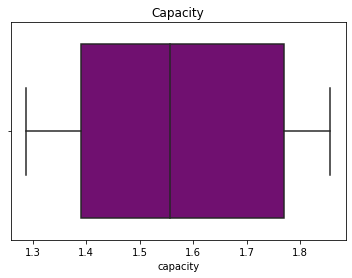

In [18]:
#checking distribution of capacity 
sns.boxplot(data=gdf, x="capacity",color="purple")
plt.title("Capacity")

<b>From the above plot, it is seen that the capacity ranges from almost 1.4 to 1.8. And also it is seen that there is no outliers in the capacity field </b>

<b>Visualising how columns vary on each cycle: Discharge data</b>

Text(0.5, 1.0, 'Cycle vs capacity')

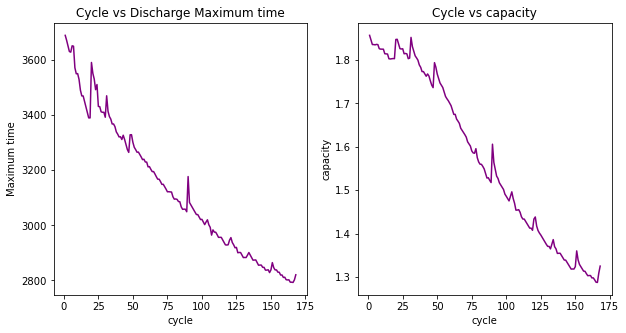

In [19]:
#Visualisation of the maximum time recorded in each cycle
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(gdf['cycle'],gdf['time'],color="purple")
plt.xlabel('cycle')
plt.ylabel('Maximum time')
plt.title('Cycle vs Discharge Maximum time')
plt.subplot(1,2,2)
plt.plot(gdf['cycle'],gdf['capacity'],color="purple")
plt.xlabel('cycle')
plt.ylabel('capacity')
plt.title('Cycle vs capacity')


<b>From the above graph it is seen that the maximum time for each Discharge cycle decreases slowly as the cycle increases. Also it reflects quite similar pattern in way which capacity is reduced at each cycle. Hence it might end up being one of the feature for estimating the capacity </b>

Text(0.5, 1.0, 'Cycle vs Current measured')

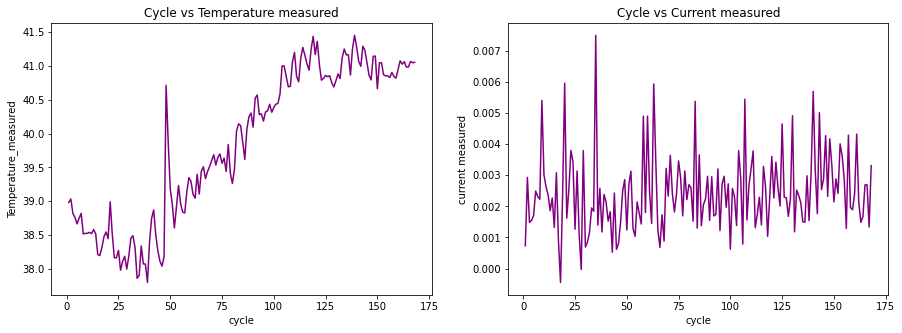

In [20]:
#Visualisation of the maximum temperature recorded in discharge each cycle
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(gdf['cycle'],gdf['temperature_measured'],color="purple")
plt.xlabel('cycle')
plt.ylabel('Temperature_measured')
plt.title('Cycle vs Temperature measured')
plt.subplot(1,2,2)
#Visualisation of the maximum current recorded in each discharge cycle
plt.plot(gdf['cycle'],gdf['current_measured'],color="purple")
plt.xlabel('cycle')
plt.ylabel('current measured')
plt.title('Cycle vs Current measured')

<b>The above figure shows the maximum temperature and current recorded in each cycle.From the above figure it is seen that the temperature measured kind of lowers at the initial cycles and rises varies in different ways as the cycle proceeds, whereas the the current measured fluctuates a lot as the cycle proceeds. </b>

In [21]:
#Grouping by cycle and displaying maximum of each field in charge data with respect to the cycle
gdf2=df2.groupby("cycle").max().reset_index()

In [22]:
gdf2.head()

,cycle,ambient_temperature,datetime,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
0,1,24,2008-04-02 13:08:17,4.209949,1.514393,27.445134,1.5,4.931,7597.875
1,2,24,2008-04-02 16:37:51,4.213016,1.515178,29.341949,1.5,4.931,10516.000
2,3,24,2008-04-02 20:55:40,4.212788,1.516894,29.553301,1.5,4.942,10484.547
3,4,24,2008-04-03 01:12:38,4.212924,1.517503,29.456340,1.5,4.942,10397.890
4,5,24,2008-04-03 05:27:49,4.212874,1.516949,29.481334,1.5,4.942,10495.203


<b>Visualising how columns vary on each cycle: Charge data</b>

Text(0.5, 1.0, 'Cycle vs Temperature measured')

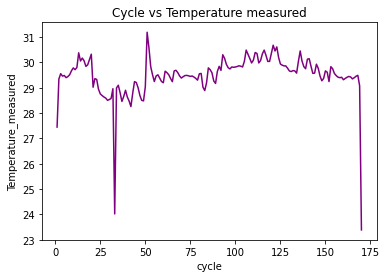

In [23]:
#Visualisation of the maximum temperature recorded in each charge cycle
plt.plot(gdf2['cycle'],gdf2['temperature_measured'],color="purple")
plt.xlabel('cycle')
plt.ylabel('Temperature_measured')
plt.title('Cycle vs Temperature measured')

<b>The above figure shows how the temperature measured varies at the each charging cycle. It is seen that the temperature measured neither continuously increase nor decrease continuously but there is a major drop in the temperature measured at the mid and  at the end of the cycle</b>

Text(0.5, 1.0, 'Cycle vs Current Measured')

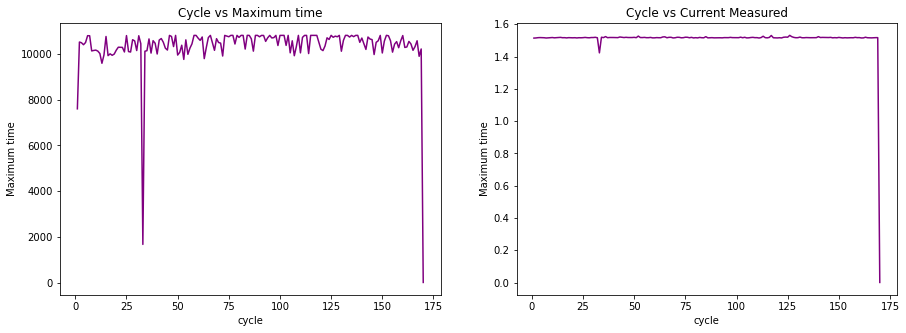

In [24]:
#Visualisation of the maximum time recorded in each charge cycle
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(gdf2['cycle'],gdf2['time'],color="purple")
plt.xlabel('cycle')
plt.ylabel('Maximum time')
plt.title('Cycle vs Maximum time')
#Visualisation of the maximum current measured in each cycle
plt.subplot(1,2,2)
plt.plot(gdf2['cycle'],gdf2['current_measured'],color="purple")
plt.xlabel('cycle')
plt.ylabel('Maximum time')
plt.title('Cycle vs Current Measured')

<b>The above figure shows the maximum charging time and current measured varies on each cycle. Although there is no much difference in both in initial cycles, it lowers at the last cycle. It is almost seen that it doesn'differ much at various cycle. Hence this might not be a favorable feature for predicting capacity which degrades as cycle increases</b>

<b>Creating new dataframe with necessary features from charging and discharging cycle.</b>

In [25]:
#retrieving maximum temperature measured,cycle and time from the discharge cycle into a new dataframe
new_df=gdf[["cycle"]] 
new_df["dis_max_temp"]=gdf["temperature_measured"]
new_df["dis_max_time"]=gdf["time"]

In [26]:
#retrieving maximum temperature and time measured from the charge cycle and adding to new dataframe- since cycle is 170 retrieving last 168 cycles
ch_mx_time=gdf2[2:].reset_index()["time"]
ch_mx_temp=gdf2[2:].reset_index()["temperature_measured"]
new_df["ch_max_temp"]=ch_mx_temp
new_df["ch_max_time"]=ch_mx_time
#since the charging's maximum threshold voltage is 4.2, retrieving the time taken in that stage
new_df["ch_max_vol_time"]=df2[df2["voltage_measured"]>4.2].groupby("cycle").first()[2:].reset_index()["time"]

In [27]:
#Since the battery voltage fell to 2.7V - retrieving time of the discharge's minimum threshold voltage 
dis_min_vol_t=df[df["voltage_measured"]<2.7]["time"].reset_index().drop("index",axis=1)
#adding Discharge's minimum voltage time as a column in new dataframe
new_df["dis_min_vol_time"]=dis_min_vol_t

In [28]:
#Adding the discharge's constant current,cut off voltage, capacity fade, rated capacity and ambient temperature to the new dataframe
#since all these feature have a constant value in all the data we dont consider this for prediction
new_df["dis_current"]=2
new_df["cutoff_voltage"]=2.7
new_df["capacity_fade"]=1.4
new_df["rated_capacity"]=2
new_df["amb_temperature"]=24
new_df["capacity"]=gdf[["capacity"]] 

In [29]:
#Overview of the new Dataframe with all the necessary features from charge and discharge cycles.
df=new_df
df

,cycle,dis_max_temp,dis_max_time,ch_max_temp,ch_max_time,ch_max_vol_time,dis_min_vol_time,dis_current,cutoff_voltage,capacity_fade,rated_capacity,amb_temperature,capacity
0,1,38.982181,3690.234,29.553301,10484.547,3238.719,3346.937,2,2.7,1.4,2,24,1.856487
1,2,39.033398,3672.344,29.456340,10397.890,3229.203,3328.828,2,2.7,1.4,2,24,1.846327
2,3,38.818797,3651.641,29.481334,10495.203,3228.218,3309.422,2,2.7,1.4,2,24,1.835349
3,4,38.762305,3631.563,29.395820,10792.672,3229.438,3309.719,2,2.7,1.4,2,24,1.835263
4,5,38.665393,3629.172,29.438424,10789.985,3231.672,3307.688,2,2.7,1.4,2,24,1.834646
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,164,40.983663,2793.390,29.392476,10316.906,1547.125,2327.578,2,2.7,1.4,2,24,1.293464
164,165,40.982342,2793.390,29.451853,10571.390,1536.906,2318.109,2,2.7,1.4,2,24,1.288003
165,166,41.063751,2792.485,29.487007,9892.375,1535.297,2316.938,2,2.7,1.4,2,24,1.287453
166,167,41.047030,2802.016,29.072716,10212.234,1582.203,2355.609,2,2.7,1.4,2,24,1.309015


In [30]:
#Getting description about the data
df.describe()

,cycle,dis_max_temp,dis_max_time,ch_max_temp,ch_max_time,ch_max_vol_time,dis_min_vol_time,dis_current,cutoff_voltage,capacity_fade,rated_capacity,amb_temperature,capacity
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.0,1.680000e+02,1.680000e+02,168.0,168.0,168.000000
mean,84.500000,39.845110,3129.523887,29.505108,10366.368643,2374.768857,2829.493821,2.0,2.700000e+00,1.400000e+00,2.0,24.0,1.572502
std,48.641546,1.118020,246.654499,0.820508,1097.084591,646.423757,343.564337,0.0,8.017503e-15,4.008752e-15,0.0,0.0,0.190413
min,1.000000,37.801336,2792.485000,23.386983,12.656000,0.000000,2316.938000,2.0,2.700000e+00,1.400000e+00,2.0,24.0,1.287453
25%,42.750000,38.804674,2901.343750,29.309984,10186.492250,1835.511750,2500.961000,2.0,2.700000e+00,1.400000e+00,2.0,24.0,1.390021
50%,84.500000,40.080753,3086.078000,29.562788,10566.133000,2310.336000,2799.250000,2.0,2.700000e+00,1.400000e+00,2.0,24.0,1.557085
75%,126.250000,40.865238,3323.230750,29.859987,10791.007750,3001.457250,3185.926000,2.0,2.700000e+00,1.400000e+00,2.0,24.0,1.769163
max,168.000000,41.450232,3690.234000,31.187718,10807.328000,3304.750000,3346.937000,2.0,2.700000e+00,1.400000e+00,2.0,24.0,1.856487


In [31]:
#Getting info about the different columns in dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cycle             168 non-null    int64  
 1   dis_max_temp      168 non-null    float64
 2   dis_max_time      168 non-null    float64
 3   ch_max_temp       168 non-null    float64
 4   ch_max_time       168 non-null    float64
 5   ch_max_vol_time   168 non-null    float64
 6   dis_min_vol_time  168 non-null    float64
 7   dis_current       168 non-null    int64  
 8   cutoff_voltage    168 non-null    float64
 9   capacity_fade     168 non-null    float64
 10  rated_capacity    168 non-null    int64  
 11  amb_temperature   168 non-null    int64  
 12  capacity          168 non-null    float64
dtypes: float64(9), int64(4)
memory usage: 17.2 KB


In [32]:
#Checking to see any null value exist
df.isnull().sum()

cycle               0
dis_max_temp        0
dis_max_time        0
ch_max_temp         0
ch_max_time         0
ch_max_vol_time     0
dis_min_vol_time    0
dis_current         0
cutoff_voltage      0
capacity_fade       0
rated_capacity      0
amb_temperature     0
capacity            0
dtype: int64

<b>Visualising Columns relationship with Capacity </b>

Text(0.5, 1.0, 'Discharge minimum threshold voltage time Vs capacity')

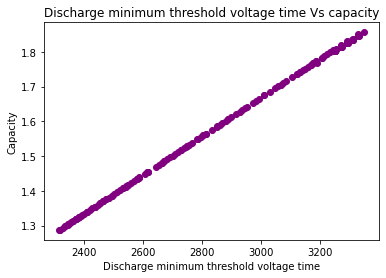

In [33]:
#Visualising to see the relationship between capacity and discharge minimum threshold voltage time

plt.scatter(new_df["dis_min_vol_time"],gdf['capacity'],color="purple")
plt.xlabel('Discharge minimum threshold voltage time')
plt.ylabel('Capacity')
plt.title('Discharge minimum threshold voltage time Vs capacity')

<b>From above it is seen that there exist a linear relationship between the discharge minimum threshold voltage time and the capacity. Hence this will be one of the suitable feature for predicting the capacity</b>

Text(0.5, 1.0, 'Charge maximum threshold voltage time Vs capacity')

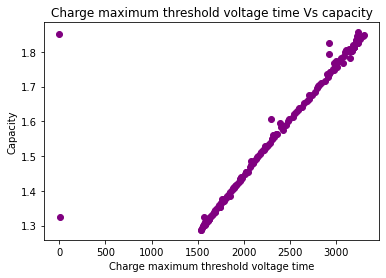

In [34]:
plt.scatter(new_df["ch_max_vol_time"],gdf['capacity'],color="purple")
plt.xlabel('Charge maximum threshold voltage time')
plt.ylabel('Capacity')
plt.title('Charge maximum threshold voltage time Vs capacity')

<b>The above graph shows the relationship between the charge maximum threshold voltage time and the capacity. Except at the initial time it is seen that the charge minimum threshold voltage time too has a quite linear relationship with the capacity </b>

Text(0.5, 1.0, 'Discharge maximum time Vs capacity')

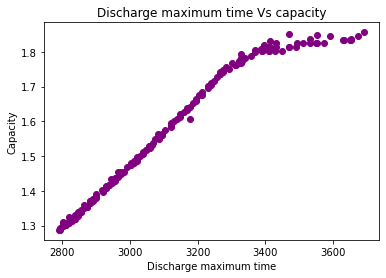

In [35]:
plt.scatter(new_df["dis_max_time"],gdf['capacity'],color="purple")
plt.xlabel('Discharge maximum time')
plt.ylabel('Capacity')
plt.title('Discharge maximum time Vs capacity')

<b>From the above graph it is seen that the discharge maximum time has a good relationship with the capacity. Hence this would be one of the suitable features to predict the capacity</b>

In [36]:
#Checking correlation 
df.corr()

,cycle,dis_max_temp,dis_max_time,ch_max_temp,ch_max_time,ch_max_vol_time,dis_min_vol_time,dis_current,cutoff_voltage,capacity_fade,rated_capacity,amb_temperature,capacity
cycle,1.000000,9.148574e-01,-9.810839e-01,1.643579e-01,2.466418e-02,-9.041014e-01,-9.883568e-01,NaN,0.000000e+00,0.000000e+00,NaN,NaN,-9.877389e-01
dis_max_temp,0.914857,1.000000e+00,-8.968214e-01,3.618241e-01,6.420005e-02,-8.476529e-01,-9.352831e-01,NaN,9.696458e-16,-9.696458e-16,NaN,NaN,-9.352719e-01
dis_max_time,-0.981084,-8.968214e-01,1.000000e+00,-2.045777e-01,-7.458920e-02,8.778342e-01,9.771037e-01,NaN,8.830046e-16,-8.830046e-16,NaN,NaN,9.755228e-01
ch_max_temp,0.164358,3.618241e-01,-2.045777e-01,1.000000e+00,7.467357e-01,9.957348e-02,-2.319991e-01,NaN,8.616742e-17,-8.616742e-17,NaN,NaN,-2.332679e-01
ch_max_time,0.024664,6.420005e-02,-7.458920e-02,7.467357e-01,1.000000e+00,3.152079e-01,-7.189352e-02,NaN,9.150777e-16,-9.150777e-16,NaN,NaN,-7.217135e-02
ch_max_vol_time,-0.904101,-8.476529e-01,8.778342e-01,9.957348e-02,3.152079e-01,1.000000e+00,8.992280e-01,NaN,1.157309e-16,-1.157309e-16,NaN,NaN,8.985890e-01
dis_min_vol_time,-0.988357,-9.352831e-01,9.771037e-01,-2.319991e-01,-7.189352e-02,8.992280e-01,1.000000e+00,NaN,-3.022161e-15,3.022161e-15,NaN,NaN,9.999474e-01
dis_current,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cutoff_voltage,0.000000,9.696458e-16,8.830046e-16,8.616742e-17,9.150777e-16,1.157309e-16,-3.022161e-15,NaN,1.000000e+00,-1.000000e+00,NaN,NaN,3.668177e-15
capacity_fade,0.000000,-9.696458e-16,-8.830046e-16,-8.616742e-17,-9.150777e-16,-1.157309e-16,3.022161e-15,NaN,-1.000000e+00,1.000000e+00,NaN,NaN,-3.668177e-15


# Feature Selection

<AxesSubplot:>

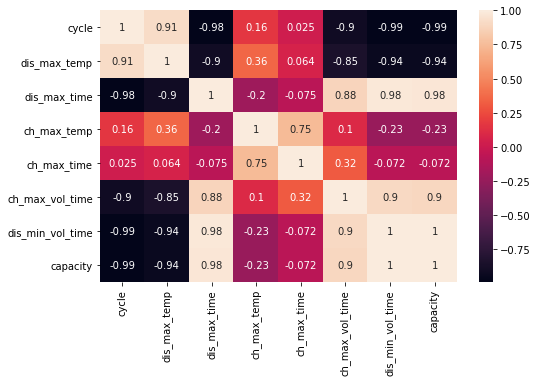

In [37]:
#visualising correlation using heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df.drop(['dis_current','cutoff_voltage',"capacity_fade","rated_capacity","amb_temperature"],axis=1).corr(),annot=True,fmt=".2g")

<b>From the above visualisation of columns and  correlation, we choose the following features to predict the capacity. <ul>
    <li> <b><u>Discharge Minimum threshold voltage Time</b></u>-From the visualisation plot of capacity vs Discharge minimum threshold voltage it is seen that there exist a good linear relationship between both. Also from the above correlation,It is seen that the discharge minimum voltage time is highly correlated with the capacity . Hence it forms a major feature for estimating the capacity. </li>
    <li> <u><b>Charge maximum threshold volatage Time</b></u>- From the above correlation plot, it is seen that the Charge maximum threshold volatage is also highly correlated with the output feature (capacity).Also in visualisation with capacity it shows a quite good linear relationship with capacity. Hence it will be a perfect feature for the capacity prediction.</li>
Although the other feature like discharge maximum temperature,cycle,discharge maximum time is highly correlated with the output  it is also highly correlated with the other independent input features like discharge minimum threshold voltage time and charge maximum threshold voltage time. since correlation within the independent features themselves is not much favorable,  it is not chosen as a feature to predict the capacity in this model. 
</ul></b>

# Capacity prediction

In [38]:
#splitting data
x=df[["ch_max_vol_time","dis_min_vol_time"]].values
y=df["capacity"].values
#splitting into train data and test data
from sklearn.model_selection import train_test_split
xt,xs,yt,ys=train_test_split(x,y,test_size=0.2,random_state=1234)
#scaling datasets
from sklearn.preprocessing import StandardScaler,MinMaxScaler
st=MinMaxScaler(feature_range=(0,1))
xt=st.fit_transform(xt)
xs=st.transform(xs)
#list to store r2 score and rmse of different models for evaluation
r2=[]
rmse=[]

<B>LINEAR REGRESSION MODEL</B>

In [39]:
#predicting capacity using linear regression
from sklearn.linear_model import LinearRegression
l=LinearRegression()
l.fit(xt,yt)
yp=l.predict(xs)

r2 score- Test data 0.9998850134519757
r2 score- Train data 0.9998990917685985
Root mean square error 0.0019488124429357639


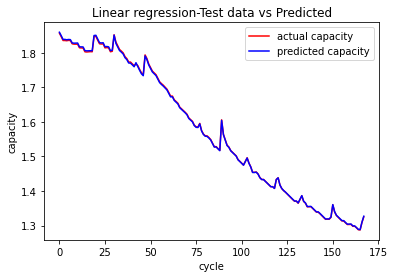

In [40]:
#Evaluation of the model-Getting r2 score of the model 
from sklearn.metrics import r2_score,mean_squared_error
print("r2 score- Test data",r2_score(ys,yp))
r2.append(r2_score(ys,yp))
print("r2 score- Train data",l.score(xt,yt))
print("Root mean square error",np.sqrt(mean_squared_error(ys,yp)))
rmse.append(np.sqrt(mean_squared_error(ys,yp)))
#plotting expected vs predicted capacity
plt.plot(list(y),label="actual capacity",color="red")
plt.plot(list(l.predict(st.transform(x))),label="predicted capacity",color="blue")
plt.xlabel("cycle")
plt.ylabel("capacity")
plt.title("Linear regression-Test data vs Predicted")
plt.legend()

<b>SUPPORT VECTOR REGRESSION MODEL</b>

In [41]:
#predicting capacity using SVR
from sklearn.svm import SVR
s=SVR()
s.fit(xt,yt)
yp=s.predict(xs)

r2 score- Test data 0.9222501884762117
r2 score- Train data 0.9125452884650678
Root mean square error 0.050675284801434704


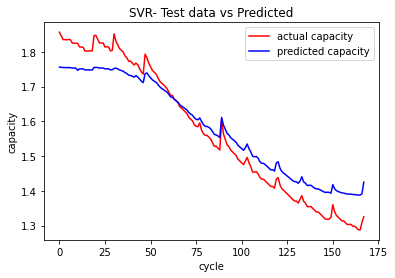

In [42]:
#Evaluation of the model-Getting r2 score of the model 
from sklearn.metrics import r2_score,mean_squared_error
print("r2 score- Test data",r2_score(ys,yp))
print("r2 score- Train data",s.score(xt,yt))
r2.append(r2_score(ys,yp))
print("Root mean square error",np.sqrt(mean_squared_error(ys,yp)))
rmse.append(np.sqrt(mean_squared_error(ys,yp)))
#plotting expected vs predicted capacity
plt.plot(list(y),label="actual capacity",color="red")
plt.plot(list(s.predict(st.transform(x))),label="predicted capacity",color="blue")
plt.xlabel("cycle")
plt.ylabel("capacity")
plt.title("SVR- Test data vs Predicted")
plt.legend()

<B>RIDGE REGRESSION MODEL </B>

In [43]:
#predicting capacity using ridge regression
from sklearn.linear_model import Ridge
r = Ridge(alpha=1.0)
r.fit(xt, yt)
yp=r.predict(xs)

r2 score -Test data 0.997290569019247
r2 score -Train data 0.9935526997101236
Root mean square error 0.009459878792388526


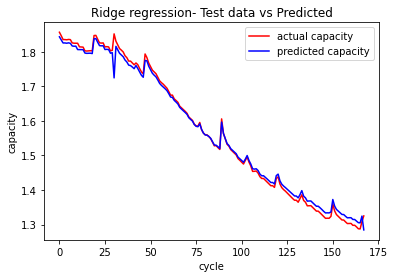

In [44]:
#Evaluation of the model-Getting r2 score of the model 
print("r2 score -Test data",r2_score(ys,yp))
print("r2 score -Train data",r.score(xt,yt))
print("Root mean square error",np.sqrt(mean_squared_error(ys,yp)))
r2.append(r2_score(ys,yp))
rmse.append(np.sqrt(mean_squared_error(ys,yp)))
#plotting expected vs predicted capacity
plt.plot(list(y),label="actual capacity",color="red")
plt.plot(list(r.predict(st.transform(x))),label="predicted capacity",color="blue")
plt.xlabel("cycle")
plt.ylabel("capacity")
plt.title("Ridge regression- Test data vs Predicted")
plt.legend()

<B>POLYNOMIAL REGRESSION MODEL</B>

r2 score train data 0.9999415524594927
r2 score test data 0.9999249315470957
Root mean square error 0.0015746181695549197


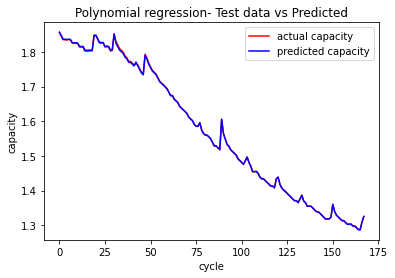

In [45]:
#predicting capacity using Polynomial regression
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree = 2)
xp = pr.fit_transform(xt)
lr = LinearRegression()
lr.fit(xp, yt)
yp=lr.predict(pr.transform(xs))
yp1=lr.predict(pr.transform(xt))
#Evaluation of the model-Getting r2 score of the model 
print('r2 score train data',r2_score(yt,yp1))
print('r2 score test data',r2_score(ys,yp))
print('Root mean square error',np.sqrt(mean_squared_error(ys,yp)))
r2.append(r2_score(ys,yp))
rmse.append(np.sqrt(mean_squared_error(ys,yp)))
#plotting expected vs predicted capacity
plt.plot(list(y),label="actual capacity",color="red")
plt.plot(list(lr.predict(pr.transform(st.transform(x)))),label="predicted capacity",color="blue")
plt.xlabel("cycle")
plt.ylabel("capacity")
plt.title("Polynomial regression- Test data vs Predicted")
plt.legend()

# Model selection for capacity prediction

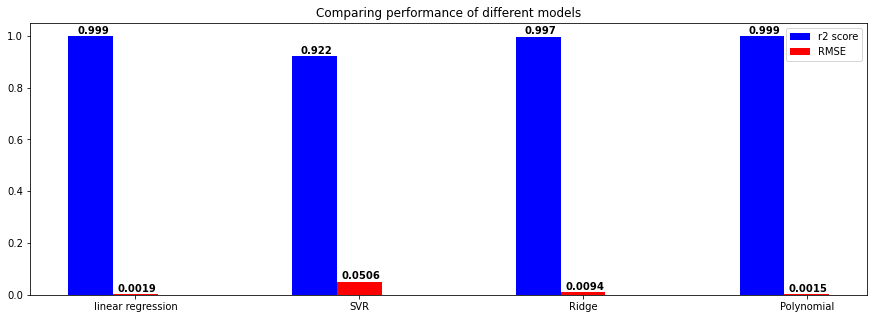

In [46]:
#visualised comparison of performance of models
n=4
ind = np.arange(n) 
width = 0.2

plt.figure(figsize=(15,5))
plt.title("Comparing performance of different models")
#plot for accuracy
bar1 = plt.bar(ind, r2, width, color = 'b')
for i, v in enumerate(r2):
    plt.text(i-0.06,v+0.01, s=str(v)[:5], color='black', fontweight='bold')
#plot for Recall
bar2 = plt.bar(ind+width, rmse, width, color='r')
for i, v in enumerate(rmse):
    plt.text(i+0.12,v+0.01, s=str(v)[:6], color='black', fontweight='bold')

plt.xticks(ind+width,["linear regression","SVR","Ridge","Polynomial"])
plt.legend( (bar1, bar2 ), ('r2 score','RMSE') ,loc=1)
plt.show()

<b>From the above graph it is seen that the R2 score of the linear regression and polynomial regression is quite similar. Since the r2 score is similar we decide the best model based on the Root mean square error. Although there is not much big difference in the root mean square error of the linear regression and polynomial regression, polynomial regression comparatively provides less rmse than linear regression by few margin. Hence we choose the polynomial regression model to predict the capacity</b>

In [47]:
#saving the chosen model for capacity prediction
import pickle as pk
pk.dump(lr,open('lin_poly_5.pkl','wb'))
pk.dump(pr,open('poly_5.pkl','wb'))
pk.dump(st,open('Minmaxscaler1_5.pkl','wb'))

# Remaining Cycle prediction

Text(0.5, 1.0, 'cycle vs capacity with Threshold')

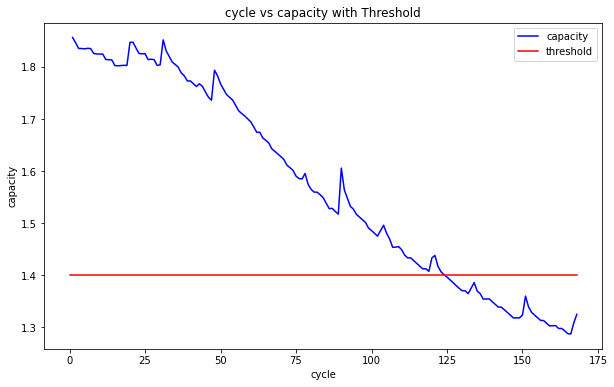

In [48]:
#plotting to see how capacity decreases with cycle with threshold 
plt.figure(figsize=(10, 6))
plt.plot(df['cycle'],df['capacity'],color="blue",label="capacity")
plt.plot([0.,max(df["cycle"])], [1.4, 1.4],color="red",label="threshold")
plt.xlabel("cycle")
plt.legend()
plt.ylabel("capacity")
plt.title("cycle vs capacity with Threshold")

In [49]:
#Given End of life criteria-1.4Ahr- determing the cycle number where it has reached the end of life
df[df["capacity"]<=1.4000000]["cycle"].iloc[0]

125

From above it is seen that the cycles hasn't reached the threshold limit, Hence considering last cycle as the threshold (End of cycle). We estimate the remaining cycle using the formula below <br>
<center> <b>"Cycles Remaining = End of life cycle - current cycle "</b></center>

In [50]:
#Estimating Remaining cycle
li=[] #list for appending the remaining cycles for each cycle
n=125 #Since this is the cycle where the batteries reached end of life
for i in range(len(df)):
       r=n-df.iloc[i]["cycle"]
       #if r<0:
        #r=0
       li.append(r)
df["rem_cycle"]=li

In [51]:
#visualising the dataframe after adding remaining cycles as a cloumn
df

,cycle,dis_max_temp,dis_max_time,ch_max_temp,ch_max_time,ch_max_vol_time,dis_min_vol_time,dis_current,cutoff_voltage,capacity_fade,rated_capacity,amb_temperature,capacity,rem_cycle
0,1,38.982181,3690.234,29.553301,10484.547,3238.719,3346.937,2,2.7,1.4,2,24,1.856487,124.0
1,2,39.033398,3672.344,29.456340,10397.890,3229.203,3328.828,2,2.7,1.4,2,24,1.846327,123.0
2,3,38.818797,3651.641,29.481334,10495.203,3228.218,3309.422,2,2.7,1.4,2,24,1.835349,122.0
3,4,38.762305,3631.563,29.395820,10792.672,3229.438,3309.719,2,2.7,1.4,2,24,1.835263,121.0
4,5,38.665393,3629.172,29.438424,10789.985,3231.672,3307.688,2,2.7,1.4,2,24,1.834646,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,164,40.983663,2793.390,29.392476,10316.906,1547.125,2327.578,2,2.7,1.4,2,24,1.293464,-39.0
164,165,40.982342,2793.390,29.451853,10571.390,1536.906,2318.109,2,2.7,1.4,2,24,1.288003,-40.0
165,166,41.063751,2792.485,29.487007,9892.375,1535.297,2316.938,2,2.7,1.4,2,24,1.287453,-41.0
166,167,41.047030,2802.016,29.072716,10212.234,1582.203,2355.609,2,2.7,1.4,2,24,1.309015,-42.0


# Feature selection

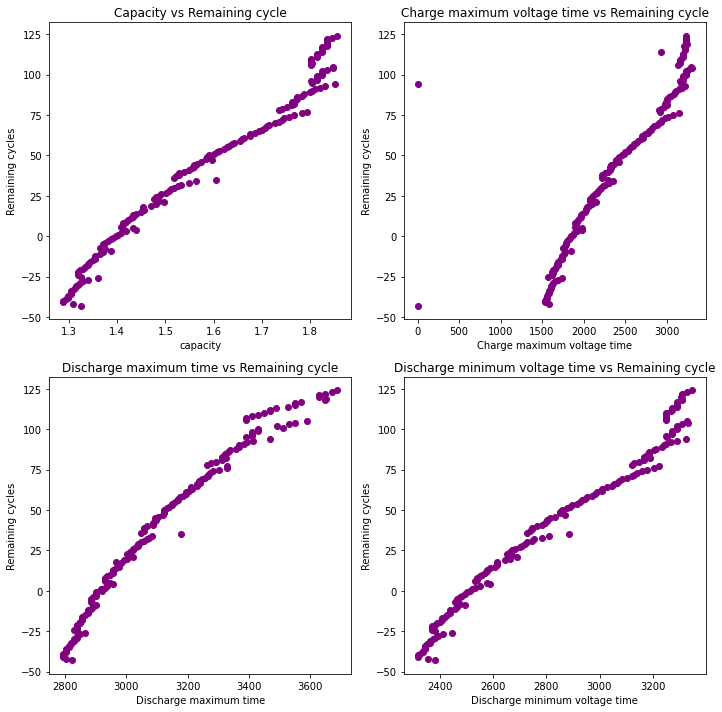

In [52]:
#visualising the columns with the remaining cycles
#plotting Capacity vs Remaining cycle
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(df["capacity"],df["rem_cycle"],color="purple")
plt.xlabel("capacity")
plt.ylabel("Remaining cycles")
plt.title("Capacity vs Remaining cycle")
#plotting charging maximum voltage time vs remaining cycle
plt.subplot(2,2,2)
plt.scatter(df["ch_max_vol_time"],df["rem_cycle"],color="purple")
plt.xlabel("Charge maximum voltage time")
plt.ylabel("Remaining cycles")
plt.title("Charge maximum voltage time vs Remaining cycle")
#plotting Discharge maximum time vs remaining cycle
plt.subplot(2,2,3)
plt.scatter(df["dis_max_time"],df["rem_cycle"],color="purple")
plt.xlabel("Discharge maximum time")
plt.ylabel("Remaining cycles")
plt.title("Discharge maximum time vs Remaining cycle")
#plotting Discharge minimum voltage time vs remaining cycle
plt.subplot(2,2,4)
plt.scatter(df["dis_min_vol_time"],df["rem_cycle"],color="purple")
plt.xlabel("Discharge minimum voltage time")
plt.ylabel("Remaining cycles")
plt.title("Discharge minimum voltage time vs Remaining cycle")
plt.tight_layout()

<b> The above graph shows the how the features are related with the Remaining cycles.It is seen that when the cycle increases, all features like capacity,Discharge minimum threshold voltage time,Charge maximum threshold voltage time, discharge maximum time increases and from the above graph we could say that these features have a quite good linear relationship within themselves. Hence these would be some of the good features for predicting the cycle. Before concluding the features to predict capacity, checking the correlation of these features with the capacity below. </b>

<AxesSubplot:>

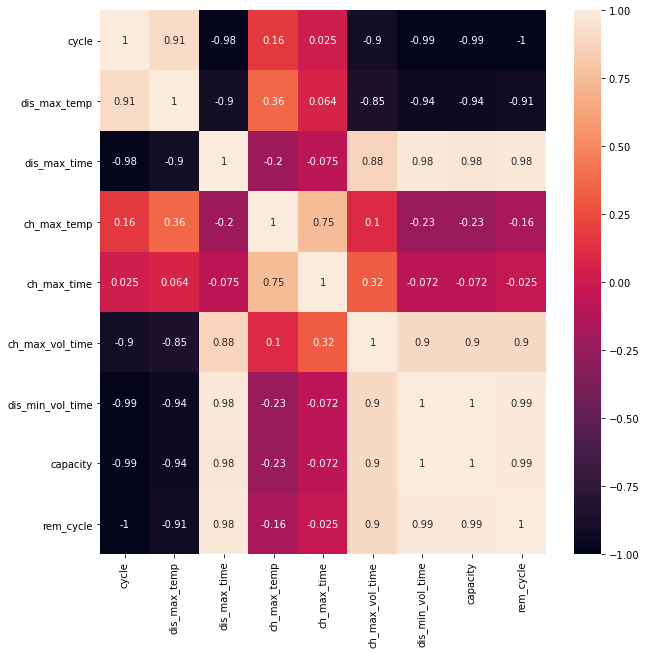

In [53]:
#checking to see correlation between the features
plt.figure(figsize=(10,10))
sns.heatmap(df.drop(['dis_current','cutoff_voltage',"capacity_fade","rated_capacity","amb_temperature"],axis=1).corr(),annot=True,fmt=".2g")

<b>From the above visualisations and the correlation,we use these following features to estimate the cycles of the battery:
    <li><b><u>capacity</b></u> - Inorder to estimate the Remaining cycles definetly capacity would be the most necessary feature because as Also from the above correlation table it is seen that the capacity and the discharge minimum threshold voltage time is highly correlated with the remaining cycle value. But since there exist a high correlation within themselves we choose any one feature from them ie. capacity. </li>
    <li> <b><u>charging maximum voltage threshold time</b></u>- Charging takes place in constant current mode until a voltage threshold is reached.charging maximum threshold voltage threshold time is fairly correlated with the cycle. hence we choose these features to predict the cycles.</li>
    <li><b><u>discharge maximum time </u> </b>- Generally, Whether the battery is in use or not, the battery will deteriorate with time as cycle increases, due to factors like increased internal resistance. Also it seen that discharge maximum time is also quite correlated with the cycle. hence we choose discharge maximum time as one of the features to estimate the remaining cycles. </li>
<b>

# Remaining Cycle prediction

In [54]:
#splitting the input and output features
x=df[["capacity","ch_max_vol_time","dis_max_time"]]
y=df["rem_cycle"]
from sklearn.preprocessing import StandardScaler,MinMaxScaler
st=MinMaxScaler(feature_range=(0,1))
#scaling using min max scaler
x=st.fit_transform(x)
pk.dump(st,open('Minmaxscaler2_5.pkl','wb'))
#splitting into train data and test data
from sklearn.model_selection import train_test_split
xt,xs,yt,ys=train_test_split(x,y,test_size=0.2,random_state=1234)
#list to store r2 score and rmse of different models for evaluation
r21=[]
rmse1=[]

<b> LINEAR REGRESSION MODEL </B>

In [55]:
#predicting capacity using linear regression
from sklearn.linear_model import LinearRegression
l=LinearRegression()
l.fit(xt,yt)
yp=l.predict(xs)

r2 score- Test data 0.9866068160258684
r2 score- Train data 0.9825272996492628
Root mean square error 5.1966896055609855


Text(0.5, 1.0, 'Linear regression-Test data vs Predicted')

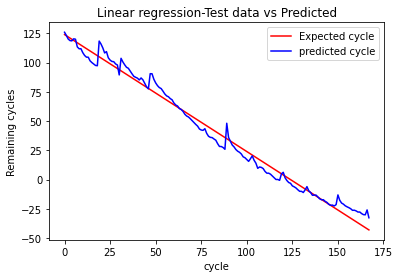

In [56]:
#Evaluation of the model-Getting r2 score of the model 
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import mean_absolute_error
print("r2 score- Test data",r2_score(ys,yp))
print("r2 score- Train data",l.score(xt,yt))
print("Root mean square error",np.sqrt(mean_squared_error(ys,yp)))
#appending  to r21 for later evaluation
r21.append(r2_score(ys,yp))
#plotting the expected vs predicted cycle
plt.plot(list(y),label="Expected cycle",color="red")
plt.plot(list(l.predict(x)),label="predicted cycle",color="blue")
plt.xlabel("cycle")
plt.ylabel("Remaining cycles")
plt.legend()
plt.title("Linear regression-Test data vs Predicted")

<B>SUPPORT VECTOR REGRESSION MODEL</B>

In [57]:
#predicting capacity using SVR
from sklearn.svm import SVR
s=SVR(C=1000,kernel='rbf',gamma=1)
s.fit(xt,yt)
yp=s.predict(xs)

r2 score- Test data 0.995796326816459
train score- Train data 0.9925282527909943
Root mean square error 2.9113829370422493


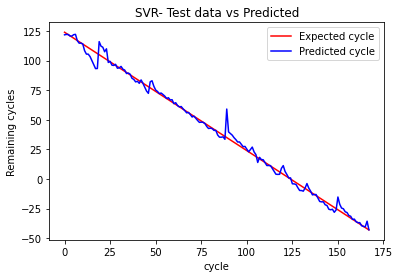

In [58]:
#Evaluation of the model-Getting r2 score of the model 
from sklearn.metrics import r2_score,mean_squared_error
print("r2 score- Test data",r2_score(ys,yp))
print("train score- Train data",s.score(xt,yt))
print("Root mean square error",np.sqrt(mean_squared_error(ys,yp)))
r21.append(r2_score(ys,yp))
#plotting the expected vs predicted cycle
plt.plot(list(y),label="Expected cycle",color="red")
plt.plot(list(s.predict(x)),label="Predicted cycle",color="blue")
plt.xlabel("cycle")
plt.ylabel("Remaining cycles")
plt.title("SVR- Test data vs Predicted")
plt.legend()

<B>RIDGE REGRESSION MODEL</B>

In [59]:
#predicting capacity using ridge regression
from sklearn.linear_model import Ridge
r = Ridge(alpha=0.1)
r.fit(xt, yt)
yp=r.predict(xs)

r2 score- Test data 0.986892552552992
r2 score- Train data 0.9825012387359969
Root mean square error 5.140956425381443


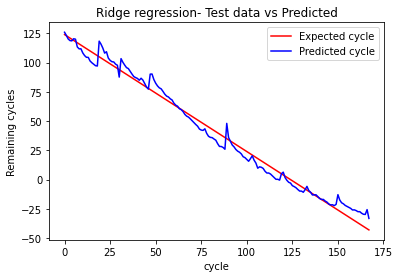

In [60]:
#Evaluation of the model-Getting r2 score of the model 
print("r2 score- Test data",r2_score(ys,yp))
print("r2 score- Train data",r.score(xt,yt))
r21.append(r2_score(ys,yp))
print("Root mean square error",np.sqrt(mean_squared_error(ys,yp)))
#plotting the expected vs predicted cycle
plt.plot(list(y),label="Expected cycle",color="red")
plt.plot(list(r.predict(x)),label="Predicted cycle",color="blue")
plt.xlabel("cycle")
plt.ylabel("Remaining cycles")
plt.title("Ridge regression- Test data vs Predicted")
plt.legend()

<B>POLYNOMIAL REGRESSION MODEL</B>

r2 score -Train data 0.993021932418116
r2 score -Test data 0.9920478594997617
Root mean square error 4.004302539712348


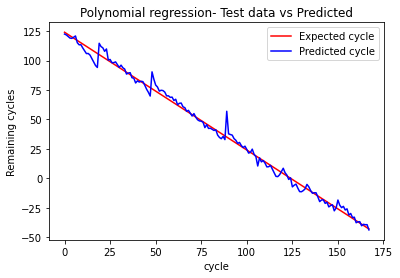

In [61]:
#predicting capacity using Polynomial regression
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree = 2)
xp = pr.fit_transform(xt)
lr = LinearRegression()
lr.fit(xp, yt)
yp=lr.predict(pr.transform(xs))
yp1=lr.predict(pr.transform(xt))
#Evaluation of the model-Getting r2 score of the model 
print('r2 score -Train data',r2_score(yt,yp1))
print('r2 score -Test data',r2_score(ys,yp))
print('Root mean square error',np.sqrt(mean_squared_error(ys,yp)))
r21.append(r2_score(ys,yp))
#plotting the expected vs predicted cycle
plt.plot(list(y),label="Expected cycle",color="red")
plt.plot(list(lr.predict(pr.transform(x))),label="Predicted cycle",color="blue")
plt.xlabel("cycle")
plt.ylabel("Remaining cycles")
plt.title("Polynomial regression- Test data vs Predicted")
plt.legend()

# Model selection for cycle prediction

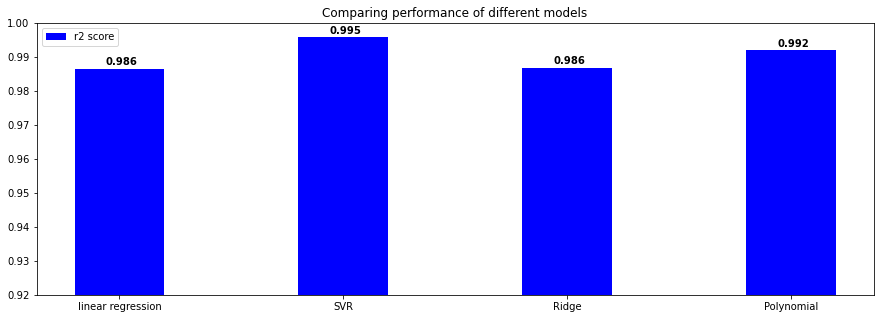

In [62]:
#comparing performance of model 
n=4
ind = np.arange(n) 
width = 0.4
# Setting figure size and figure name
plt.figure(figsize=(15,5))
plt.title("Comparing performance of different models")
#plot for r2 score of different models
bar1 = plt.bar(ind, r21, width, color = 'b',label="r2 score")
plt.ylim(0.92,1)
#Iterating to display value on each bar
for i, v in enumerate(r21):
    plt.text(i-0.06,v+0.001, s=str(v)[:5], color='black', fontweight='bold')
#setting names for each bar
plt.xticks(ind,["linear regression","SVR","Ridge","Polynomial"])
plt.legend(loc=2)
plt.show()

# CONCLUSION

<b>Although the r2 scores of the different models didn't show much of the big difference, It is seen  from the above graph that,  the  R2 score of the support vector regression model performs better than Linear regression, Ridge regression and the polynomial regression models. Also the root mean square error of the support vector regression model is lower compared to the other models. Hence we choose support vector regression model for the prediction of remaining cycles. </b>

In [63]:
#saving the chosen model for cycle prediction
import pickle as pk
pk.dump(s,open('svr_5.pkl','wb'))